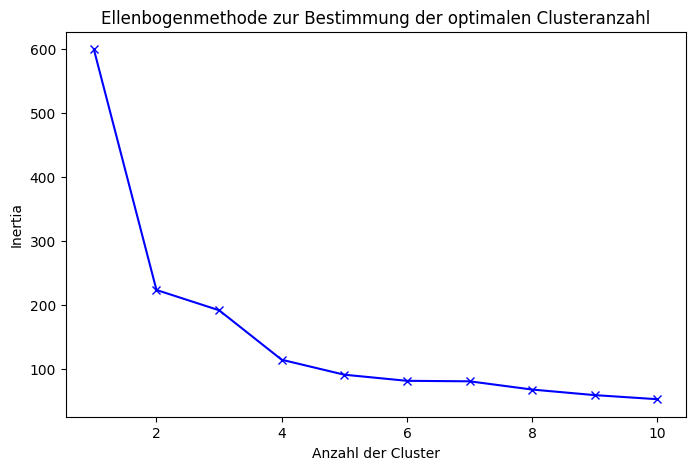

In [15]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

path = kagglehub.dataset_download("smritisingh1997/species-segmentation-using-iris-dataset")
filename = path + '/iris-dataset.csv'

scaler = StandardScaler()
df = pd.read_csv(filename)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = scaler.fit_transform(df[features])

# Inertia für verschiedene Cluster-Anzahlen berechnen
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Ellenbogenplot erstellen
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Ellenbogenmethode zur Bestimmung der optimalen Clusteranzahl')
plt.show()

Optimal k: 2


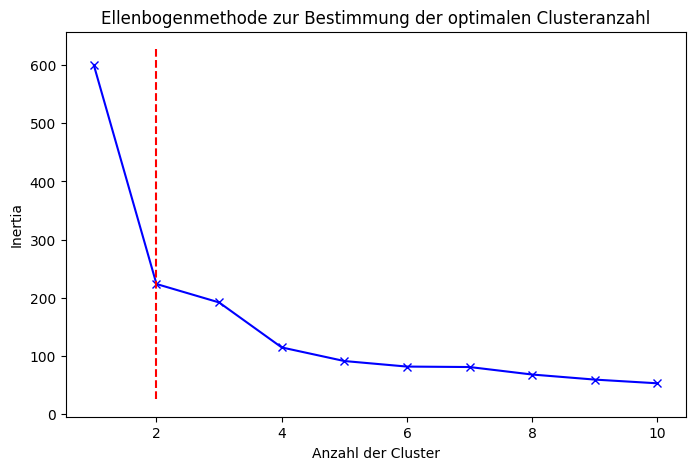

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# Differenzen der inertia Werte ermitteln.
diffs = np.diff(inertia)

# Zweite Ableitung ermitteln
second_diffs = np.diff(diffs)

# Ellenbogen-Punkt finden indem wir den Index mit des Maximalwertes suchen.
optimal_k = np.argmax(second_diffs) + 2  # +2 wegen 2x diff()


print(f"Optimal k: {optimal_k}")

# Ellenbogenplot erstellen (optional, um das Ergebnis zu visualisieren)
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Ellenbogenmethode zur Bestimmung der optimalen Clusteranzahl')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')  # Markiere optimales k
plt.show()

In [28]:
import numpy as np
from sklearn.cluster import KMeans

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Funktionen zur Berechnung der Distanzen
def intercluster_distance(X, labels, centroids):
  distances = []
  for i in range(len(centroids)):
    for j in range(i + 1, len(centroids)):
      distances.append(euclidean_distance(centroids[i], centroids[j]))
  return np.mean(distances)

def intracluster_distance(X, labels, centroids):
  distances = []
  for i in range(len(centroids)):
    cluster_points = X[labels == i]
    for point in cluster_points:
      distances.append(euclidean_distance(point, centroids[i]))
  return np.mean(distances)



n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Training....
kmeans.fit(X)

# Labels und Zentroide auslesen
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Berechne die Distanzen
inter_distance = intercluster_distance(X, labels,  centroids)
intra_distance = intracluster_distance(X, labels, centroids)

print(f"Intercluster Distance: {inter_distance}")
print(f"Intracluster Distance: {intra_distance}")

Intercluster Distance: 2.8165268924895717
Intracluster Distance: 0.9935040315761758


In [29]:

def silhouette_score(X, labels, centroids):
    n_samples = len(X)
    silhouette_values = []

    for i in range(n_samples):
        # avgDo(p): durchschnittliche Distanz zwischen p und allen anderen Datenpunkten des Clusters von p
        cluster_points = X[labels == labels[i]]
        distances_within_cluster = [euclidean_distance(X[i], point) for point in cluster_points if not np.array_equal(point, X[i])] # Exclude self
        avgDo_p = np.mean(distances_within_cluster) if distances_within_cluster else 0

        # mAvgDf(p): minimale Durchschnittsdistanz von p zu allen anderen Datenpunkten aller anderen Cluster
        min_avg_distance_to_other_clusters = float('inf')
        for j in range(len(centroids)):
            if j != labels[i]:
                other_cluster_points = X[labels == j]
                distances_to_other_cluster = [euclidean_distance(X[i], point) for point in other_cluster_points]
                avg_distance_to_other_cluster = np.mean(distances_to_other_cluster)
                min_avg_distance_to_other_clusters = min(min_avg_distance_to_other_clusters, avg_distance_to_other_cluster)

        mAvgDf_p = min_avg_distance_to_other_clusters

        # s(p): Silhouetten Koeffizient des Datenpunktes p
        silhouette_p = (mAvgDf_p - avgDo_p) / max(avgDo_p, mAvgDf_p) if max(avgDo_p, mAvgDf_p) else 0 # handle division by zero
        silhouette_values.append(silhouette_p)

    # numpy array in float array umwandeln für die Einzelwerte.
    return np.mean(silhouette_values), np.array(silhouette_values, dtype=float)

# Berechne den Silhouetten-Score und die einzelnen Werte
silhouette_index, silhouette_values = silhouette_score(X, labels, centroids)

print(f"Silhouetten-Index: {silhouette_index}")
print(f"Silhouetten-Werte: {silhouette_values}")


Silhouetten-Index: 0.47732645231183235
Silhouetten-Werte: [0.56652551 0.45598277 0.23549147 0.41993916 0.60084443 0.61465796
 0.20048418 0.41356206 0.49507484 0.29789833 0.63790387 0.31245585
 0.47186017 0.4279752  0.54778726 0.4640985  0.61505293 0.5710506
 0.58656833 0.6385835  0.44934478 0.6349292  0.42433137 0.22004278
 0.29516036 0.41574257 0.40707525 0.57551795 0.45850448 0.23832939
 0.39701613 0.45102688 0.55498586 0.53086233 0.29789833 0.07157779
 0.53696791 0.29789833 0.46604412 0.44459747 0.54313507 0.43258962
 0.26113927 0.47619255 0.61610891 0.47030144 0.63375205 0.26154336
 0.6473383  0.1764506  0.52685655 0.54097523 0.59475582 0.19313843
 0.61718327 0.44186867 0.51404506 0.23720941 0.58527239 0.15649427
 0.11090731 0.50890022 0.22276428 0.5819551  0.25638109 0.5583179
 0.4501948  0.29614454 0.4109823  0.19366876 0.54227712 0.48488411
 0.55246517 0.52515324 0.55752083 0.58760773 0.6018692  0.65439748
 0.57051864 0.12368229 0.11124818 0.04698335 0.3489099  0.59392458
 0.373

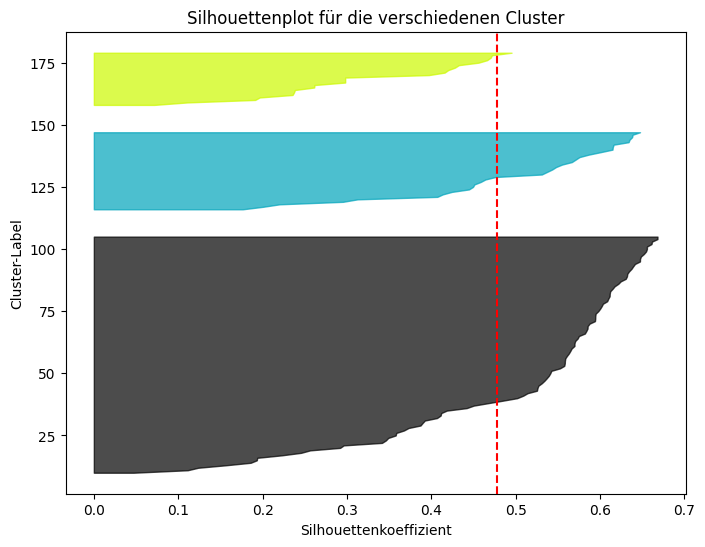

In [30]:
import matplotlib.cm as cm


# Silhouettenplot erstellen
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

y_lower = 10
for i in range(n_clusters):
    # Werte für den aktuellen Cluster extrahieren und sortieren
    ith_cluster_silhouette_values = np.sort(silhouette_values[labels == i])

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Vertikalen Abstand für den nächsten Cluster anpassen
    y_lower = y_upper + 10

# Durchschnittlichen Silhouettenwert vertikal einzeichnen
ax1.axvline(x=silhouette_index, color="red", linestyle="--")

ax1.set_title("Silhouettenplot für die verschiedenen Cluster")
ax1.set_xlabel("Silhouettenkoeffizient")
ax1.set_ylabel("Cluster-Label")

plt.show()

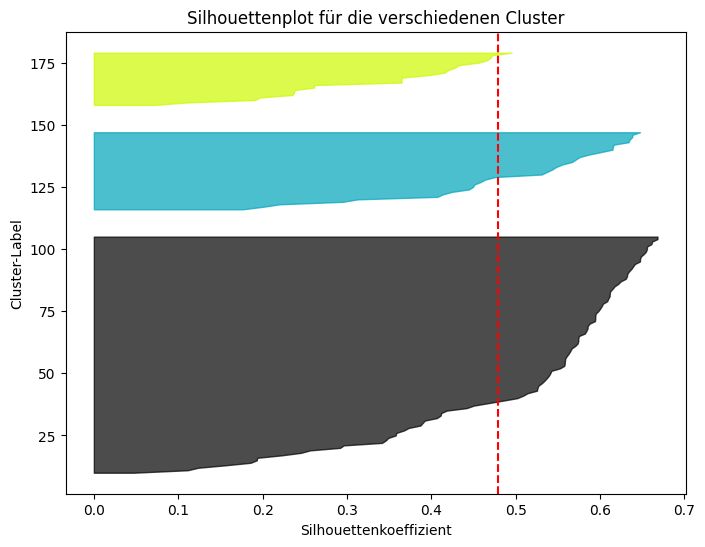

In [20]:
# Beispielcode für die Grafik aus dem Büro
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Cluster-Anzahl festlegen
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Silhouettenwerte berechnen
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Silhouettenplot erstellen
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10

# Durchschnittlichen Silhouettenwert vertikal einzeichnen
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_title("Silhouettenplot für die verschiedenen Cluster")
ax1.set_xlabel("Silhouettenkoeffizient")
ax1.set_ylabel("Cluster-Label")

plt.show()